# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [1]:
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

Let us load the mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train)))

(60000, 28, 28)
pixel range is [0,255]


We normalize the input in the range [0,1]

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

Let us visualize a few images

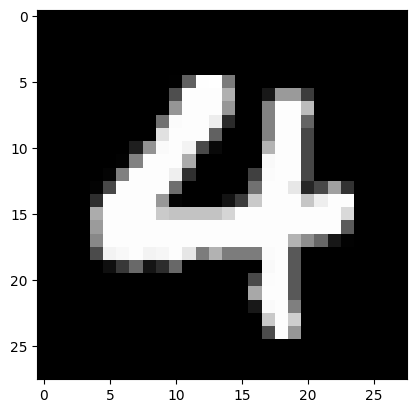

In [5]:
i = np.random.randint(0,60000)
plt.imshow(x_train[i].reshape(28,28),cmap='gray')

The output of the network will be a probability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [8]:
i = np.random.randint(0,60000)
print(y_train[i])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[i])
y_test_cat = utils.to_categorical(y_test)

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Our first Netwok just implements logistic regression

In [ ]:
xin = Input(shape=(28*28,))
#x = Dense(64, activation='relu')(xin)
x = Dense(10,activation='softmax')(xin)
#res = Activation('softmax')(x)

mynet = Model(inputs=[xin],outputs=[x])

In [ ]:
mynet.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Now we need to compile the network.
In order to do it, we need to pass two mandatory arguments:


*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
*   the **loss function**

Several predefined optimizers exist, and you should just choose your favourite one. A common choice is Adam, implementing an adaptive lerning rate, with momentum

Optionally, we can specify additional metrics, mostly meant for monitoring the training process.


In [ ]:
mynet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Finally, we fit the model over the training set.

Fitting, just requires two arguments: training data e ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

In [ ]:
mynet.fit(x_train,y_train_cat, shuffle=True, epochs=5, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(32, 784))
  warnings.warn(msg)


1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8196 - loss: 0.7050

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_7']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8197 - loss: 0.7045 - val_accuracy: 0.9155 - val_loss: 0.3131
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9131 - loss: 0.3147 - val_accuracy: 0.9198 - val_loss: 0.2839
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9201 - loss: 0.2837 - val_accuracy: 0.9205 - val_loss: 0.2825
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9240 - loss: 0.2738 - val_accuracy: 0.9230 - val_loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9252 - loss: 0.2709 - val_accuracy: 0.9254 - val_loss: 0.2671


In [ ]:
mynet.save_weights('myweights.weights.h5')

In [ ]:
xin = Input(shape=(784,))
x = Dense(47,activation='relu')(xin)
#x = BatchNormalization()(x)
res = Dense(10,activation='softmax')(x)

mynet2 = Model(inputs=xin,outputs=res)

In [ ]:
mynet2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 47)                  │          36,895 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             480 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,375 (146.00 KB)

 Trainable params: 37,375 (146.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mynet2.load_weights('myweights')

In [ ]:
mynet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=5, batch_size=32,validation_data=(x_test,y_test_cat))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8549 - loss: 0.5307 - val_accuracy: 0.9411 - val_loss: 0.2061
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9467 - loss: 0.1848 - val_accuracy: 0.9546 - val_loss: 0.1582
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9617 - loss: 0.1353 - val_accuracy: 0.9634 - val_loss: 0.1238
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9682 - loss: 0.1089 - val_accuracy: 0.9683 - val_loss: 0.1107
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9744 - loss: 0.0867 - val_accuracy: 0.9679 - val_loss: 0.1123


In [ ]:
p = mynet.predict(x_test[1:2])
print(p)
print(np.argmax(p))

In [ ]:
print(y_test[1])

In [ ]:
mynet.save_weights('myweights')

An amazing improvement. WOW!

# Exercises

1.   Add additional Dense layers and check the performance of the network
2.   Replace 'relu' with different activation functions
3. Adapt the network to work with the so called sparse_categorical_crossentropy
4. the fit function return a history of training, with temporal sequences for all different metrics. Make a plot.

